# 1. Introdução ao Código de Segmentação de Clientes com KMeans

Neste notebook, vamos realizar uma análise de segmentação de clientes usando o algoritmo de KMeans Clustering. O objetivo principal é agrupar clientes com base em suas características de idade e renda anual, de forma a identificar padrões e perfis distintos que podem ser usados para direcionar estratégias de marketing e aprimorar a oferta de produtos.

Para isso, seguiremos as seguintes etapas:

Pré-processamento dos dados: Limpeza e preparação dos dados para a análise.
Aplicação do KMeans: Ajuste do modelo de clustering com diferentes parâmetros e definição do número de clusters ideal.
Análise dos Clusters: Inspeção dos resultados, incluindo a média de cada variável por cluster e visualizações para facilitar a compreensão.
Interpretação dos Resultados: Com base nos clusters formados, geraremos insights sobre os diferentes grupos de clientes e como essas informações podem ser usadas em estratégias de negócios.
Através dessa análise, podemos segmentar de forma eficaz os clientes em grupos com características semelhantes, permitindo que a empresa personalize suas campanhas de marketing, ajuste seus preços e até mesmo desenvolva novos produtos alinhados com as necessidades e preferências de cada segmento.

# 2. Importações


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 3. Carregar os dados

In [ ]:
clientes_df = pd.read_csv('clientes_1000.csv')

# 4. Manter apenas as colunas de interesse (idade e renda anual)

In [ ]:
cliente_info_df = clientes_df[['idade', 'renda_anual']]
cliente_info_df.head()

,idade,renda_anual
0,56,125186
1,69,54674
2,46,186926
3,32,66271
4,60,93688


# 5. Normalização dos dados


In [ ]:
scaler = StandardScaler()
cliente_info_df_scaled = scaler.fit_transform(cliente_info_df)

In [ ]:
inertia = []
silhouette_scores = []
k_values = range(1, 21)  # Testando de 1 a 20 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=300, random_state=42)  # Ajustando os hiperparâmetros
    kmeans.fit(cliente_info_df_scaled)
    inertia.append(kmeans.inertia_)

    # Calculando o Silhouette Score
    if k > 1:  # O cálculo de Silhouette só é possível para k > 1
        silhouette_avg = silhouette_score(cliente_info_df_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# 5. Plotar os gráficos



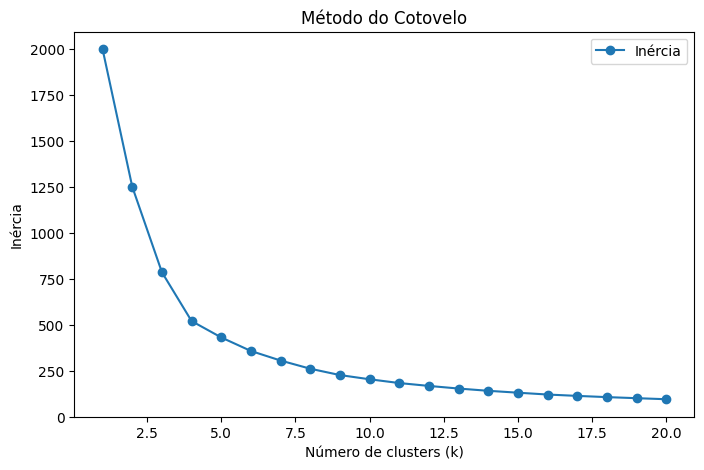

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', label='Inércia')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.legend()
plt.show()

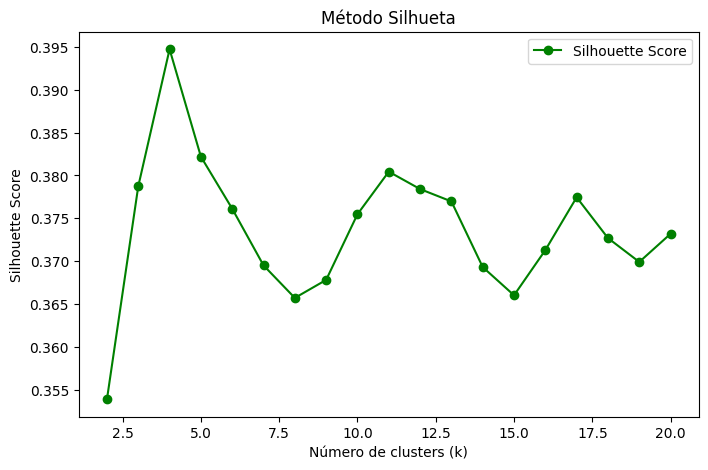

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values[1:], silhouette_scores[1:], marker='o', color='green', label='Silhouette Score')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhueta')
plt.legend()
plt.show()

# 7. Escolha de Clusters e Treinamento K-means.









In [ ]:
k = 4  # Exemplo de escolha de 4 clusters, conforme observado nos gráficos

In [ ]:
kmeans = KMeans(n_clusters=k, n_init=50, max_iter=300, random_state=42)
kmeans.fit(cliente_info_df_scaled)

KMeans(n_clusters=4, n_init=50, random_state=42)

In [ ]:
# Adicionar os rótulos dos clusters ao DataFrame
cliente_info_df['cluster'] = kmeans.labels_

# Visualizando as primeiras linhas do DataFrame com os rótulos dos clusters
cliente_info_df.head()

# Se necessário, pode-se também visualizar os centroides:
print("\nCentroides dos clusters:")
print(kmeans.cluster_centers_)

# Número de amostras por cluster
cluster_counts = cliente_info_df['cluster'].value_counts()
print("\nNúmero de amostras por cluster:")
print(cluster_counts)


Centroides dos clusters:
[[-0.89019819 -0.91792534]
 [ 0.84441133  0.88676705]
 [ 0.85168482 -0.89606963]
 [-0.83625319  0.76112291]]

Número de amostras por cluster:
cluster
3    263
1    261
2    243
0    233
Name: count, dtype: int64


<ipython-input-11-dc23bacfa797>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_info_df['cluster'] = kmeans.labels_


# 8. Gráfico de dispersão para visualizar os clusters

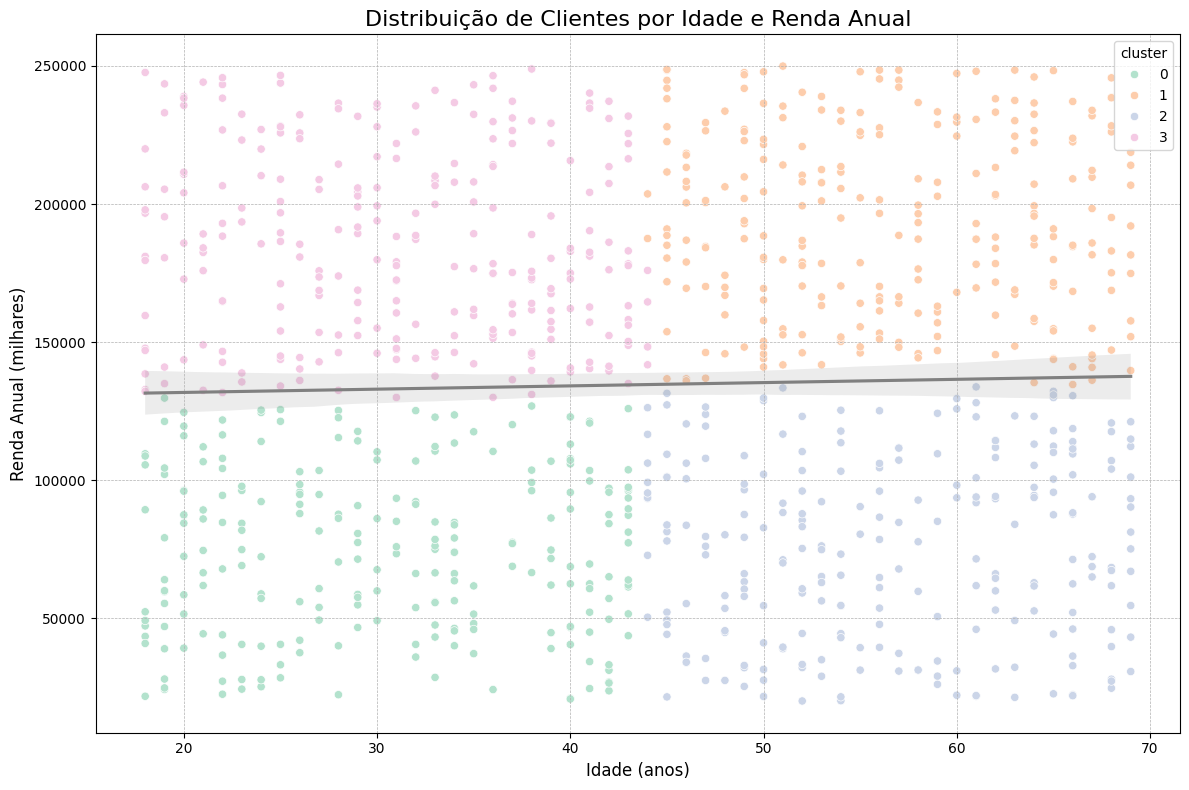

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cliente_info_df['idade'], y=cliente_info_df['renda_anual'], hue=cliente_info_df['cluster'], palette='Pastel2')
sns.regplot(x=cliente_info_df['idade'], y=cliente_info_df['renda_anual'], scatter=False, color='gray')
plt.title('Distribuição de Clientes por Idade e Renda Anual', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Renda Anual (milhares)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 9. Calcular a pontuação de Silhouette


In [ ]:
silhouette_avg = silhouette_score(cliente_info_df_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg * 100}')

Silhouette Score: 39.47271155398369


# 10. Visualização dos clusters individualmente


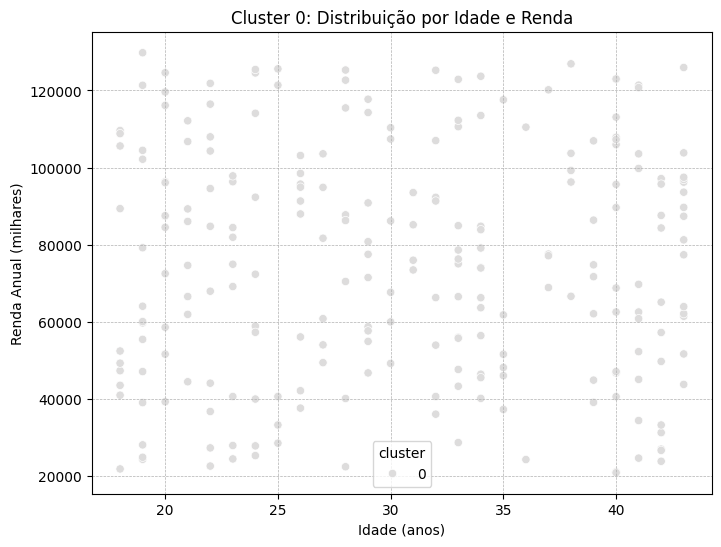

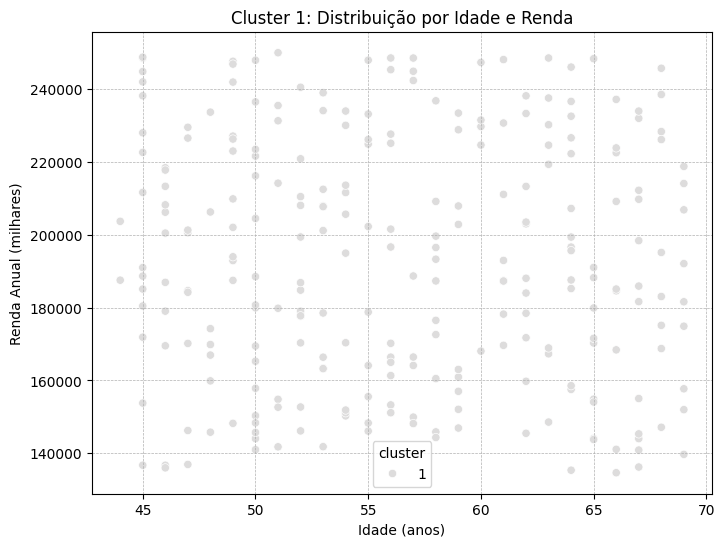

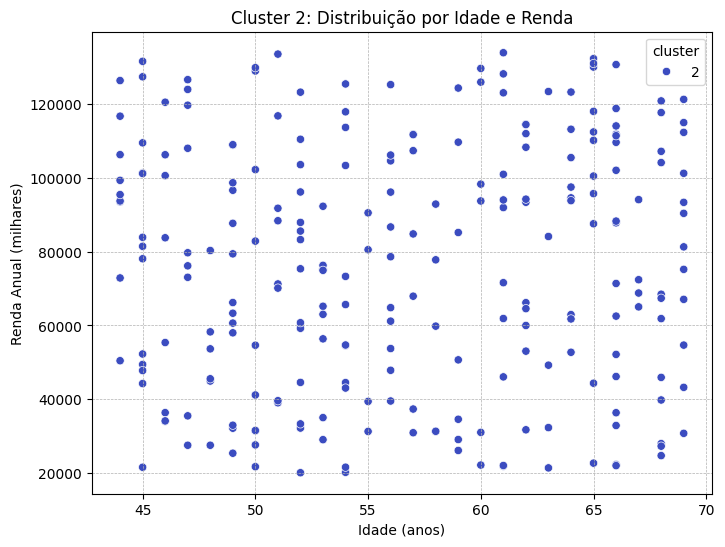

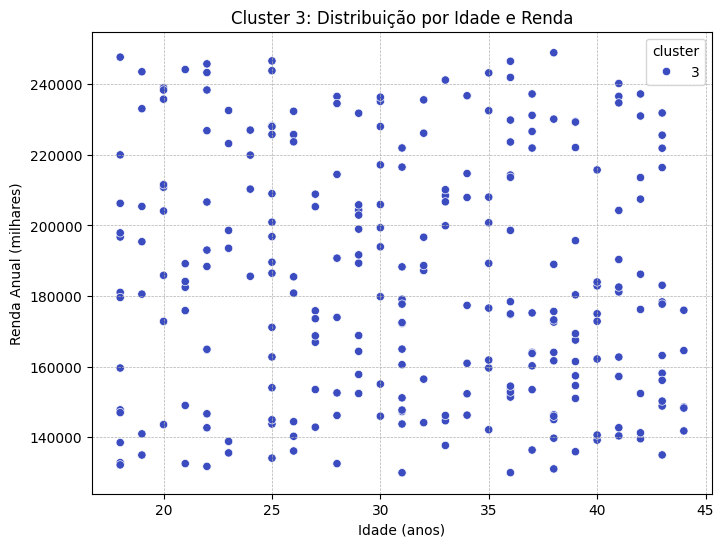

In [ ]:
for i in range(k):
    cluster_data = cliente_info_df[cliente_info_df['cluster'] == i]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=cluster_data['idade'], y=cluster_data['renda_anual'], hue=cluster_data['cluster'], palette='coolwarm')
    plt.title(f'Cluster {i}: Distribuição por Idade e Renda')
    plt.xlabel('Idade (anos)')
    plt.ylabel('Renda Anual (milhares)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

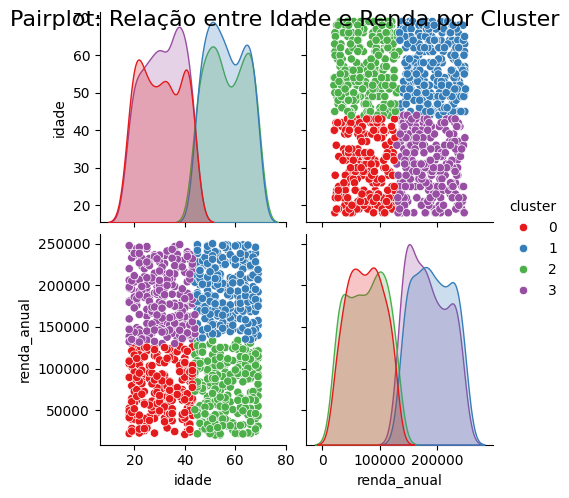

In [ ]:
# Visualização avançada: Pairplot para explorar relações entre as variáveis
sns.pairplot(cliente_info_df, hue='cluster', palette='Set1')
plt.suptitle('Pairplot: Relação entre Idade e Renda por Cluster', fontsize=16)
plt.show()

<ipython-input-16-925648d4e3bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='idade', data=cliente_info_df, palette='Set2')


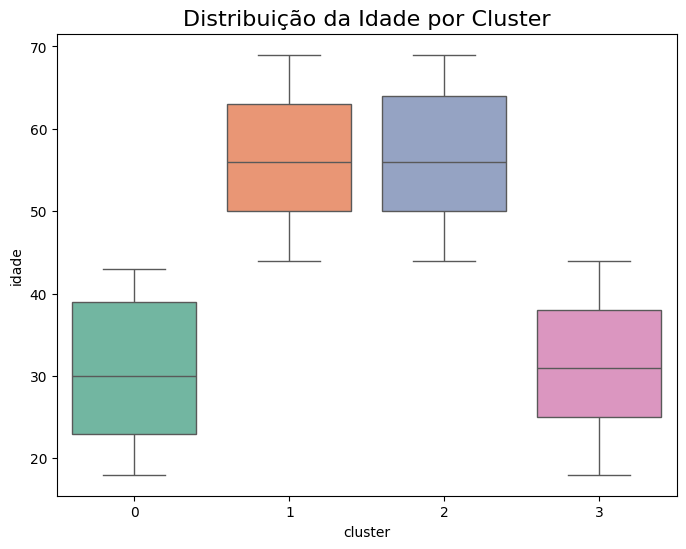

<ipython-input-16-925648d4e3bf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='renda_anual', data=cliente_info_df, palette='Set2')


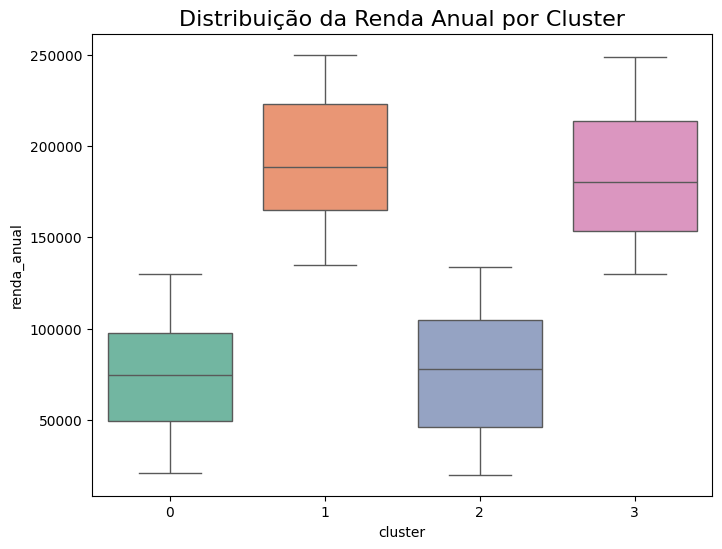

In [ ]:
# 15. Boxplot para comparar as distribuições por cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='idade', data=cliente_info_df, palette='Set2')
plt.title('Distribuição da Idade por Cluster', fontsize=16)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='renda_anual', data=cliente_info_df, palette='Set2')
plt.title('Distribuição da Renda Anual por Cluster', fontsize=16)
plt.show()


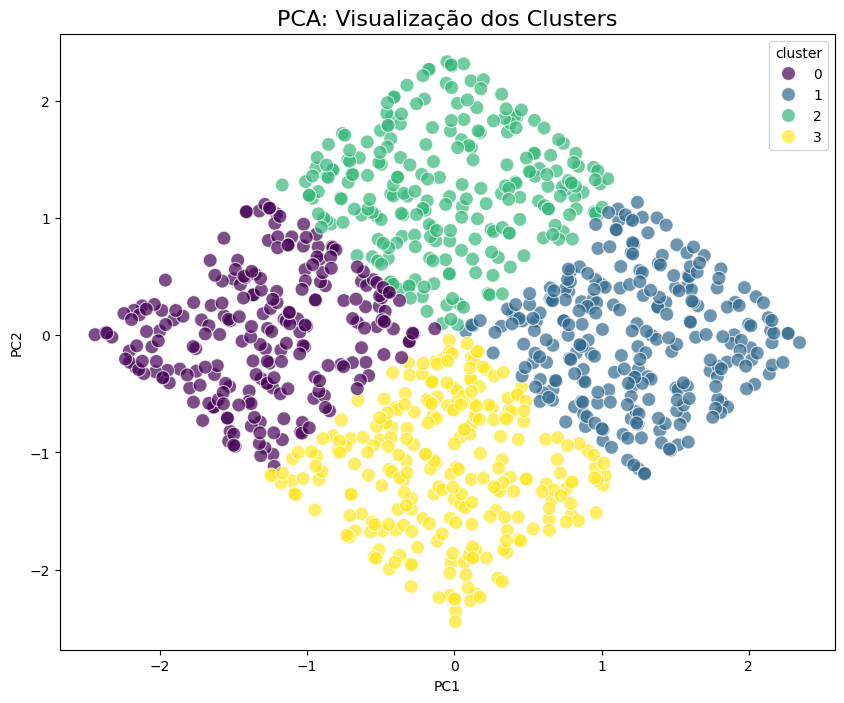

In [ ]:
# 16. Redução de dimensionalidade: PCA para visualização dos clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(cliente_info_df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cliente_info_df['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA: Visualização dos Clusters', fontsize=16)
plt.show()

In [ ]:
# 17. Conclusão (Exploração de clusters)
# Aqui você pode explorar as características de cada cluster, por exemplo:
cluster_means = cliente_info_df.groupby('cluster')[['idade', 'renda_anual']].mean()
print("\nMédia por Cluster:")
print(cluster_means)


Média por Cluster:
             idade    renda_anual
cluster                          
0        30.480687   74757.394850
1        56.471264  192490.306513
2        56.580247   76183.197531
3        31.288973  184293.646388


A aplicação do KMeans Clustering identificou quatro grupos distintos de clientes com base em suas características de idade e renda anual. A seguir, um resumo dos clusters e estratégias de marketing sugeridas:

  Cluster 0: Jovens Adultos com Renda Moderada
    Idade média: 30,5 anos
    Renda Anual média: R$ 74.757,39
    Estratégias: Focar em produtos acessíveis, como cursos online e entretenimento acessível.
  Cluster 1: Adultos mais Velhos com Alta Renda
    Idade média: 56,5 anos
    Renda Anual média: R$ 192.490,31
    Estratégias: Focar em produtos de luxo, investimentos financeiros e viagens exclusivas.
  Cluster 2: Idosos com Renda Moderada
    Idade média: 56,6 anos
    Renda Anual média: R$ 76.183,20
    Estratégias: Oferecer produtos de conforto, como seguros de saúde e cuidados pessoais.
  Cluster 3: Jovens Adultos com Alta Renda
    Idade média: 31,3 anos
    Renda Anual média: R$ 184.293,65
    Estratégias: Focar em produtos de luxo acessíveis e experiências exclusivas.

Recomendações:

Cluster 1 e 3 (40%): Investir em produtos premium e experiências exclusivas.
Cluster 0 e 2 (60%): Focar em soluções práticas e acessíveis.
Novos Produtos: Considerar serviços de assinatura para o Cluster 3 e pacotes acessíveis para o Cluster 0.
Benefícios:
Aumento na conversão e fidelização ao personalizar as ofertas.
Melhoria no ROI ao direcionar campanhas eficazes.


# Conclusão
 O uso de técnicas como KMeans para segmentação de clientes permite uma personalização mais eficaz, alinhando ofertas de produtos e campanhas publicitárias com as características e comportamentos específicos de cada grupo. A implementação dessas estratégias pode resultar em uma experiência de cliente mais enriquecedora e em resultados de negócios mais positivos.